In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pygmt
from gprm.datasets import Reconstructions
from gprm.utils.raster import to_anchor_plate
from gprm.datasets import Paleogeography


In [7]:
# Load the Scotese rotation model and raster series from remote repositories
#ScoteseModel = Reconstructions.fetch_Scotese() 

# NB here the resolution can either be '06m' or '01d'
raster_list = Paleogeography.fetch_Paleomap(resolution='06m')

# generally the input grids will have been created with anchor plate = 0, and you want to transform
# them into a different plateid frame (could be another reference frame, or fixing an actual plate)
raster_original_plate_id = 0

# For this example we rotate raster to fixed South America coo
plate_id_to_rotate_to = 201

reconstruction_time = 170.


100%|###############################################| 207M/207M [00:00<?, ?B/s]


ValueError: MD5 hash of downloaded file (2dcb7b8103ce5a1a0de4c10f99f436c7-Scotese_Wright_2018_Maps_1-88_6minX6min_PaleoDEMS_nc.zip) does not match the known hash: expected md5:89eb50d8645707ab221b023078535bda but got 6aab0a1e4feb96efef4e750f319933a0. Deleted download for safety. The downloaded file may have been corrupted or the known hash may be outdated.

grdimage [WARNING]: Mixing old CPT master tables with HINGE = <value> in c:/programs/gmt6/share/cpt/geo.cpt.  Interpreted as HARD_HINGE.


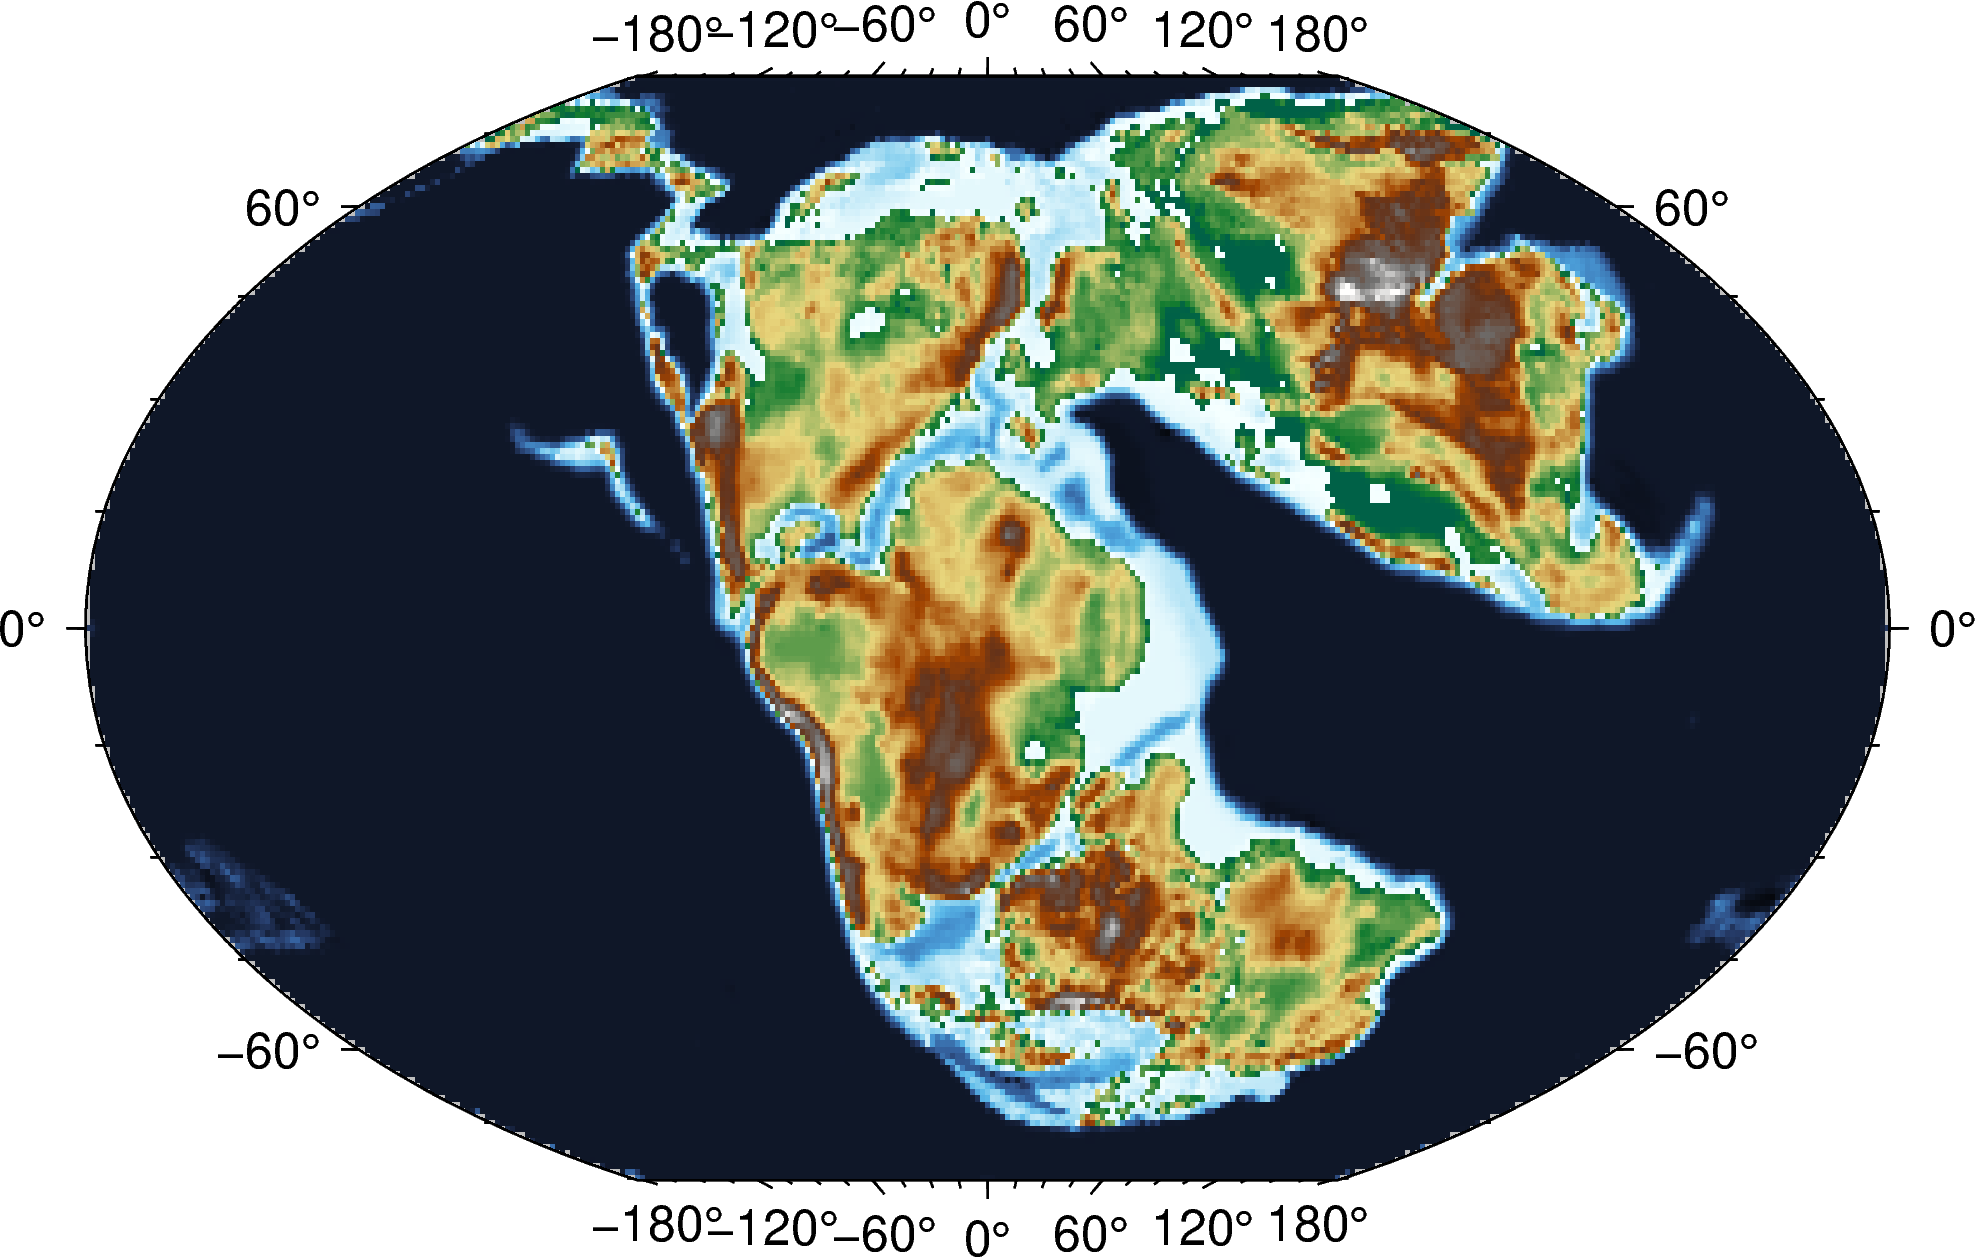

In [6]:
fig = pygmt.Figure()
fig.basemap(projection='R6i', region='d', frame='afg')
fig.grdimage(raster_list[reconstruction_time], cmap='geo')
fig.show()


grdimage [WARNING]: Mixing old CPT master tables with HINGE = <value> in c:/programs/gmt6/share/cpt/geo.cpt.  Interpreted as HARD_HINGE.


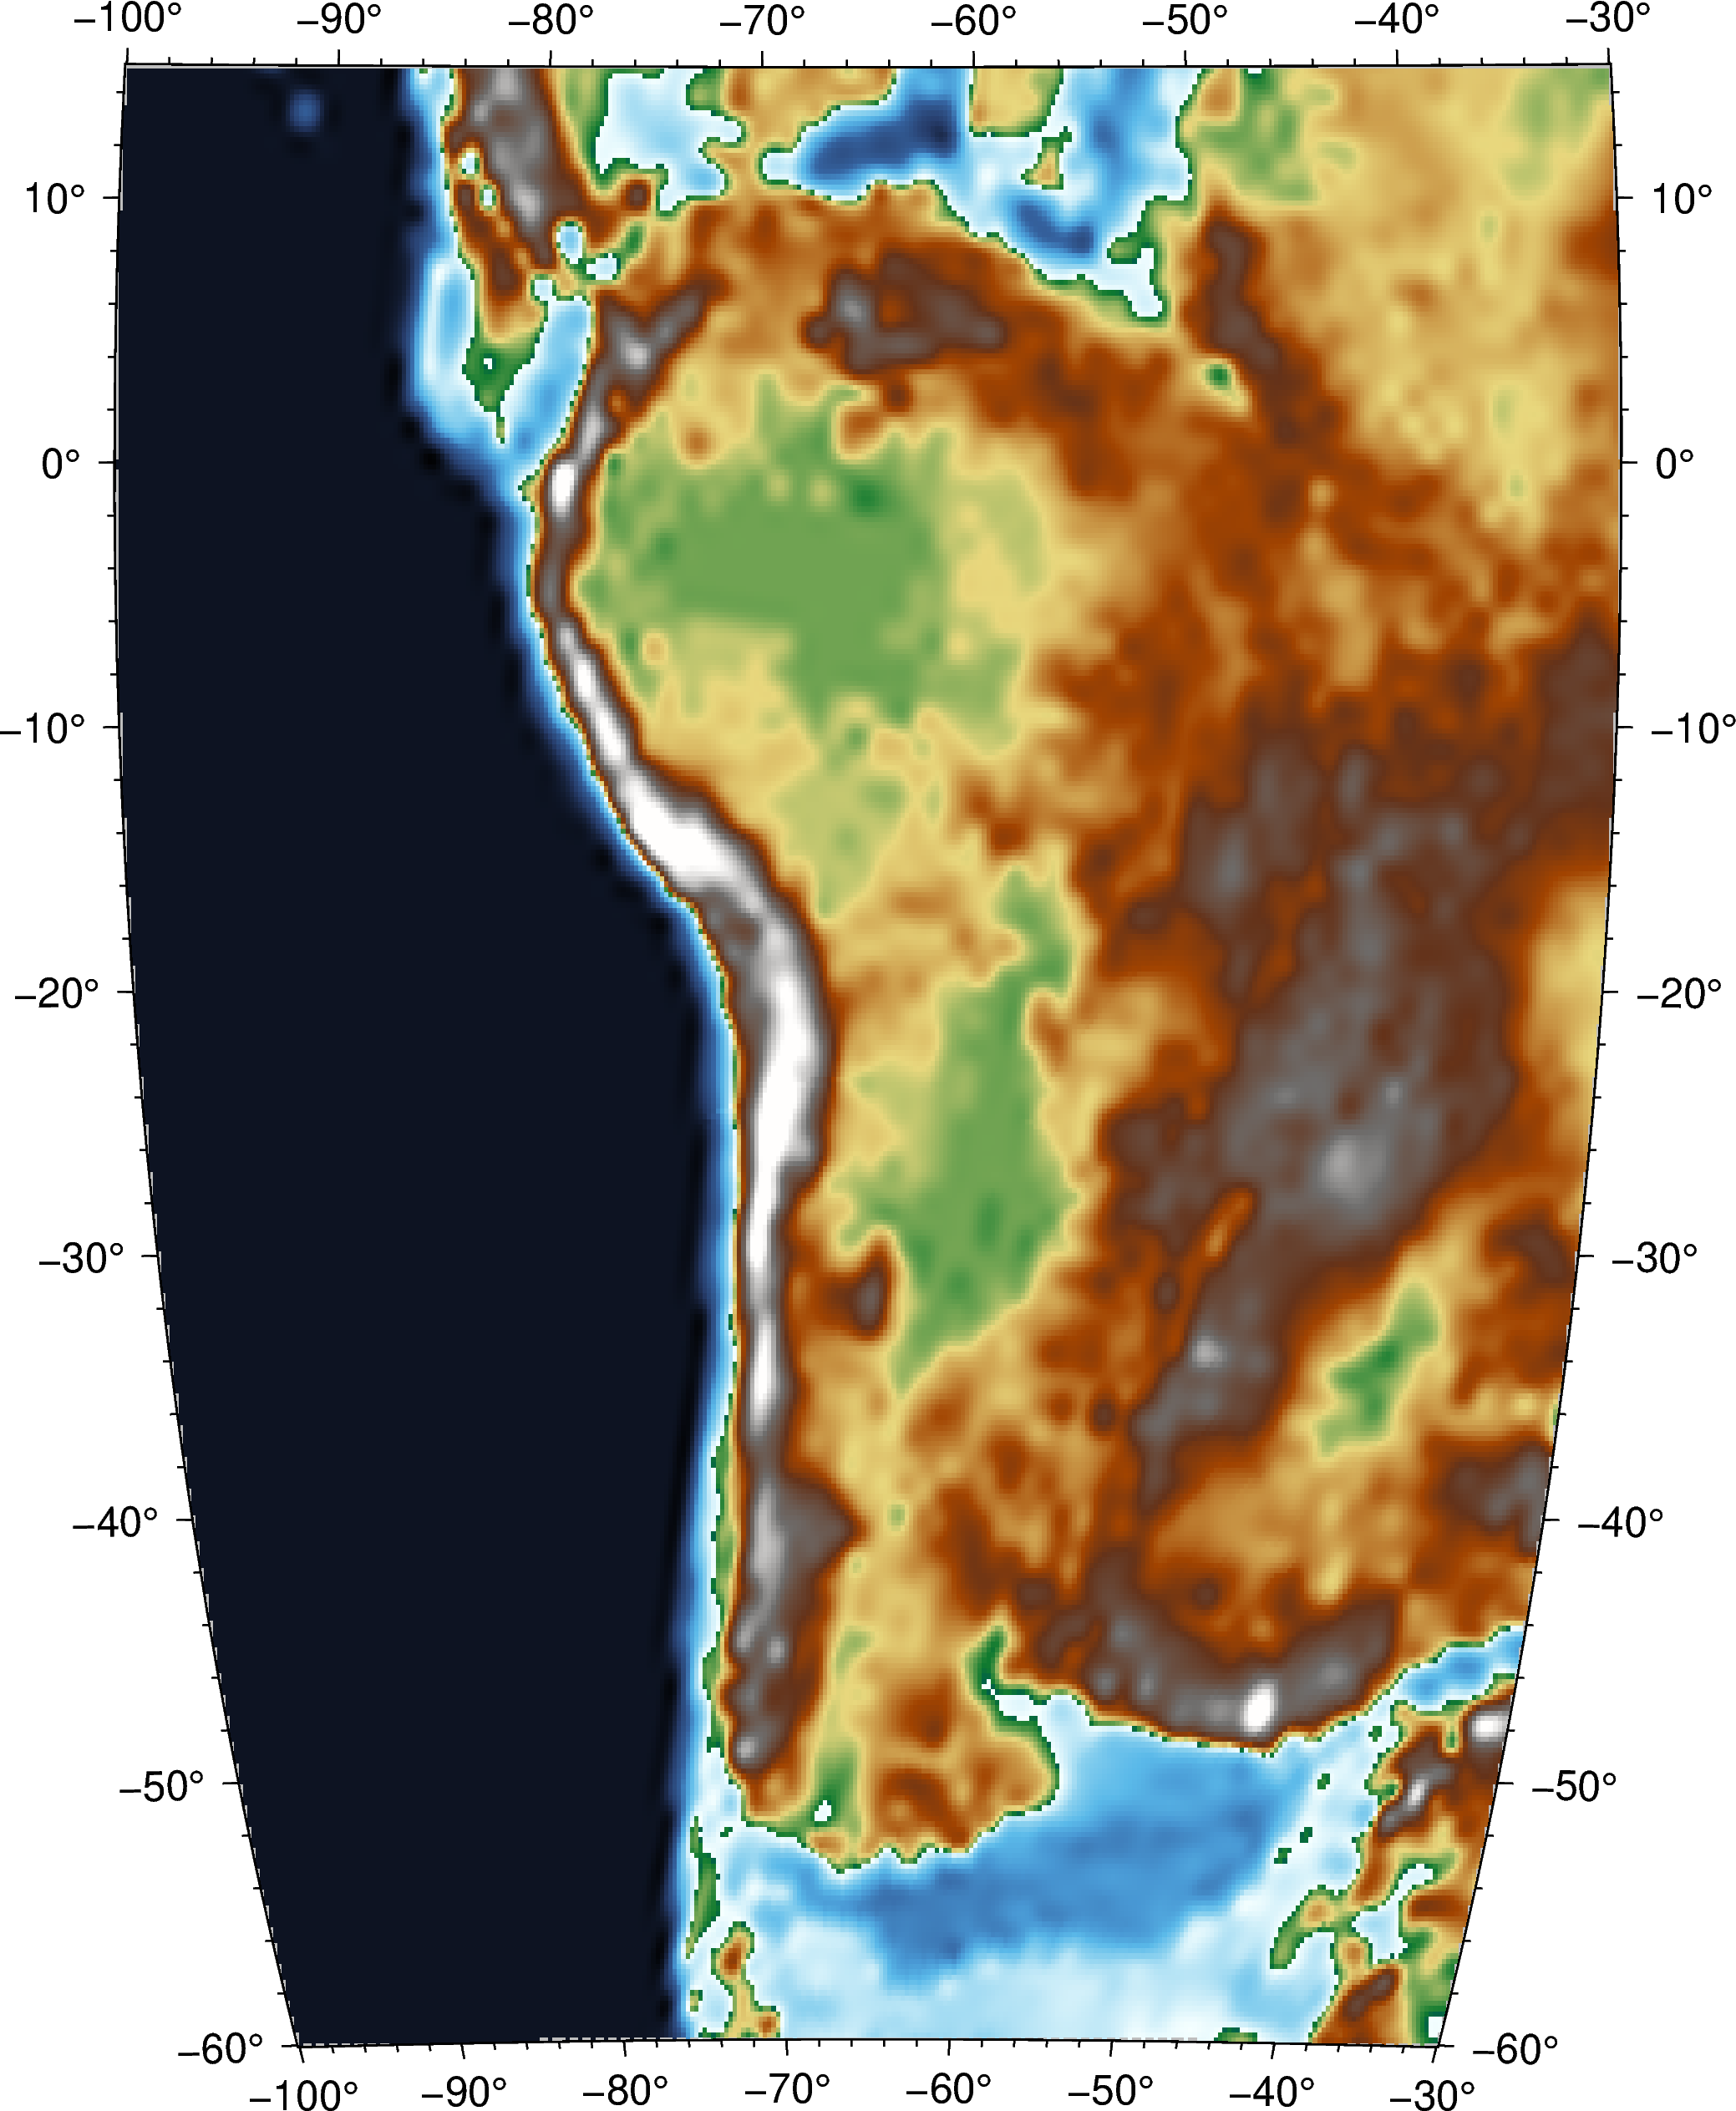

In [16]:
region = [-100,-30,-60,15]
rotated_grid = to_anchor_plate(raster_list[reconstruction_time], 
                               ScoteseModel, 
                               reconstruction_time, 
                               plate_id_to_rotate_to, 
                               region=region, spacing=0.2)

fig = pygmt.Figure()
fig.basemap(projection='R6i', region=region, frame='afg')
fig.grdimage(rotated_grid, cmap='geo')
fig.show()


In [13]:
raster_list

OrderedDict([(0.0,
              'C:\\Users\\siwil\\AppData\\Local\\gprm\\gprm\\Cache\\Paleomap_01d/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map01_PALEOMAP_1deg_Holocene_0Ma.nc'),
             (5.0,
              'C:\\Users\\siwil\\AppData\\Local\\gprm\\gprm\\Cache\\Paleomap_01d/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map03_PALEOMAP_1deg_Pliocene_5Ma.nc'),
             (10.0,
              'C:\\Users\\siwil\\AppData\\Local\\gprm\\gprm\\Cache\\Paleomap_01d/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map05_PALEOMAP_1deg_middle_Late_Miocene_10Ma.nc'),
             (15.0,
              'C:\\Users\\siwil\\AppData\\Local\\gprm\\gprm\\Cache\\Paleomap_01d/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map06_PALEOMAP_1deg_Middle_Miocene_15Ma.nc'),
             (20.0,
              'C:\\Users\\siwil\\AppData\\Local\\gprm\\gprm\\Cache\\Paleomap_01d/Scotese_Wright_2018_Maps_1-88_1degX1deg_PaleoDEMS_nc_v2/Map07_PALEOMAP_1deg_Early_Miocene_20Ma.nc'